# WORKFLOW GOAL 

### Objective:

The objective of this project is to preprocess the Titanic dataset, train a machine learning model to predict survival on the Titanic, optimize the model's performance through hyperparameter tuning, and deploy the optimized model for future predictions.

## Steps to Achieve the Objective:

### Data Preprocessing-

Handle missing values by modification or removal.
Encode categorical variables to numerical format.
Perform basic exploratory data analysis (EDA) to understand the dataset.

### Model Selection and Training:
Choose a suitable machine learning model (e.g., Logistic Regression, Decision Tree).
Split the dataset into training and testing sets.
Train the model on the training set.

### Model Evaluation-
Evaluate the model's performance using relevant metrics (e.g., accuracy, precision, recall).

### Model Optimization-
perform basic hyperparameter tuning to improve the model performance

### Conclusion-
bind all code, including data preprocessing, model training, evaluation, hyperparameter tuning, and deployment, into a Jupyter Notebook 


# DATA PREPROCESSING

## LOADING THE REQUIRED LIBRARIES

In [82]:
import numpy as np  #Data analysis and manipulation library
import pandas as pd
import seaborn as sns # visualisation libraries
import matplotlib.pyplot as plt

# Import the titanic dataset

In [83]:
df = sns.load_dataset("titanic")

# fetching the first five columns of the dataset

In [84]:
df.head(15)
    

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


## Fetching the shape of the dataset

In [85]:
df.shape

(891, 15)

### There are 891 rows and 15 columns in the dataset

# Fetching all the columns

In [86]:
df.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'], dtype=object)

### Categorical Datatypes:

survived

pclass

sex

sibsp

parch

embarked

adult_male

who

embark_town

alive

alone

## Numerical Datatypes
 
 age 
 
 fare
 



## Mixed Datatypes

Name

Deck- alphanumeric

### missing values

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### age: 177 missing values out of 891 total entries.
### embarked: 2 missing values out of 891 total entries.
### deck: 688 missing values out of 891 total entries.This column has only 203 non-null values

## we will drop the deck column as there are more than 70 percent of the missing values

In [88]:
df.drop(columns=["deck"],inplace=True)

In [89]:
df.shape #checking the column

(891, 14)

In [90]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

### now we will fill the age null values with c median

In [97]:
df["age"]=df["age"].fillna(df["age"].median())

### we will fill the embarked column with highest occuring value

In [101]:
df["embarked"].value_counts() ##checking the highest occuiring value using value counts

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [102]:
# since s is the highest occuring so we will fill the embarked missing values with s

In [103]:
df["embarked"].fillna("S", inplace = True)

In [100]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

### Now we have no missing values in our dataset

### Fetching the basic info of the data

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [105]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### The dataset includes 891 entries 
### Passengers' age were from  29 years to 80 years, with a standard deviation of 13.01
### Fare prices ranged widely, from a minimum of 0 to a maximum of 512.3 currency units.
### average fare was 32 dollars
### Most passengers (over 50%) did not travel with siblings or spouses (sibsp).
### About 62% of passengers were in the lowest socioeconomic class (pclass 3), based on the median value.

### Analysis on survived column 

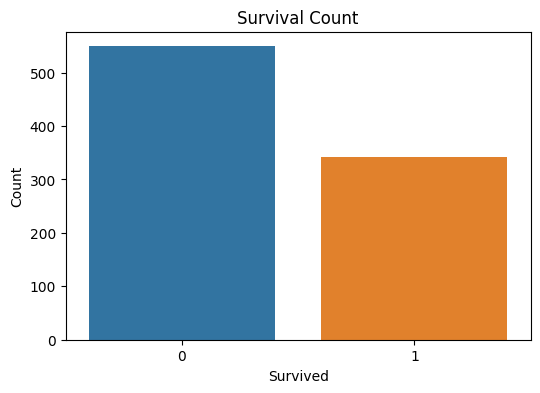

Out of 891 passengers, 62% did not survive the accident.


In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Calculate the percentage of passengers who did not survive
death = round((df['survived'].value_counts(normalize=True).values[0]) * 100)

print(f"Out of 891 passengers, {death}% did not survive the accident.")


sex
male      64.758698
female    35.241302
Name: count, dtype: float64


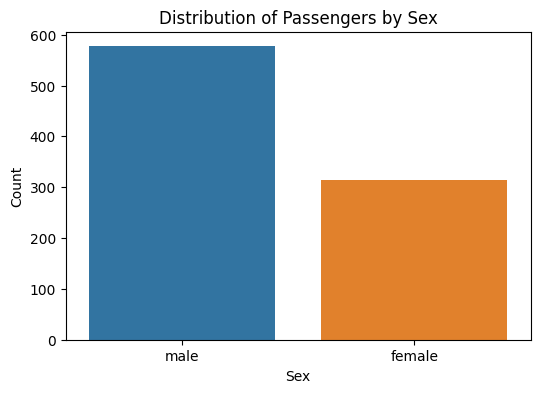

the majority of deaths were of males


In [19]:
# percentage of male and female
sex_distribution = (df['sex'].value_counts() / 891) * 100
print(sex_distribution)

# Visualize the distribution of passengers by sex
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df)
plt.title('Distribution of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# conclusion
print("the majority of deaths were of males")

sibsp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: count, dtype: float64


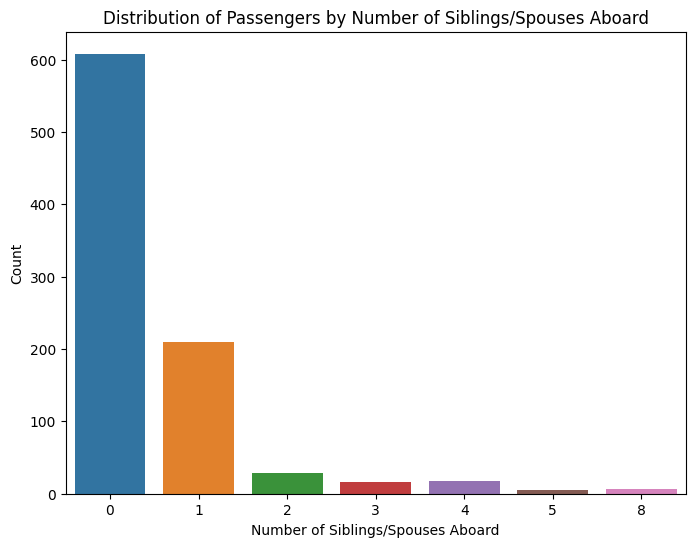

The majority of passengers had 0 siblings/spouses aboard the Titanic


In [20]:
# percentage
sibsp_distribution = (df['sibsp'].value_counts() / 891) * 100
print(sibsp_distribution)

# Visualize the distribution of passengers by sibsp
plt.figure(figsize=(8, 6))
sns.countplot(x='sibsp', data=df)
plt.title('Distribution of Passengers by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Count')
plt.show()


# Conclusion line
print("The majority of passengers had 0 siblings/spouses aboard the Titanic")


In [21]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


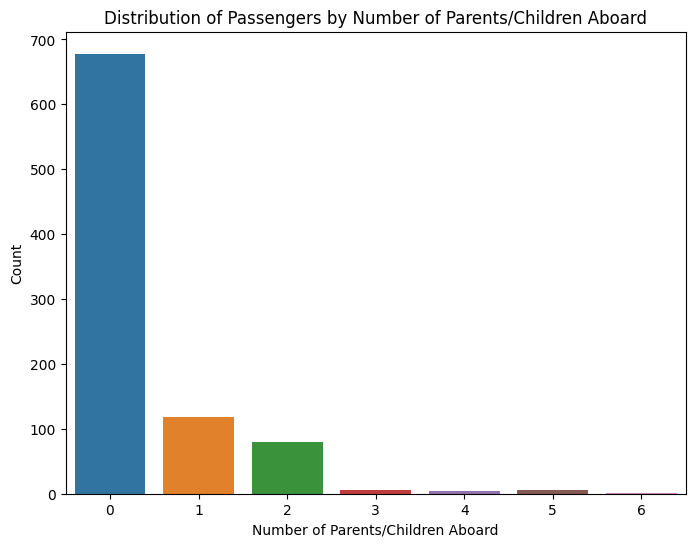

The majority of passengers had 0 parents/children aboard the Titanic


In [22]:
# percentage
parch_distribution = (df['parch'].value_counts() / 891) * 100
print(parch_distribution)

# Visualize the distribution of passengers by parch
plt.figure(figsize=(8, 6))
sns.countplot(x='parch', data=df)
plt.title('Distribution of Passengers by Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Count')
plt.show()

# Conclusion line
print("The majority of passengers had 0 parents/children aboard the Titanic")


pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


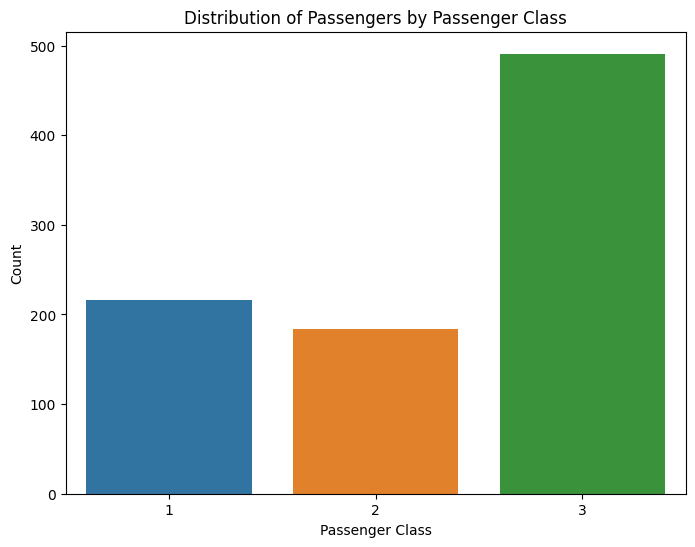

The majority of passengers were in the 3rd class on the Titanic


In [23]:
#percentage distribution of passengers by pclass
pclass_distribution = (df['pclass'].value_counts() / 891) * 100
print(pclass_distribution)

# Visualize the distribution of passengers by pclass
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', data=df)
plt.title('Distribution of Passengers by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Conclusion line
print("The majority of passengers were in the 3rd class on the Titanic")


embarked
S    72.278339
C    18.855219
Q     8.641975
Name: count, dtype: float64


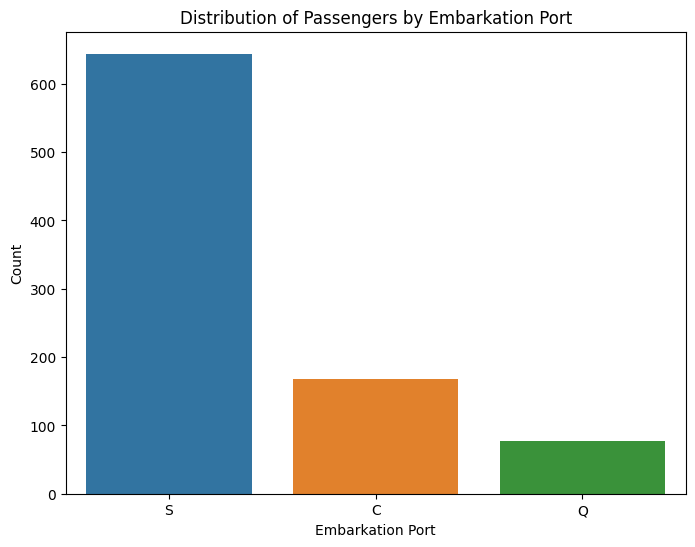

The majority of passengers embarked from port'S'(Southampton)


In [24]:
# percentage distribution of passengers by embarked
embarked_distribution = (df['embarked'].value_counts() / 891) * 100
print(embarked_distribution)

# Visualize the distribution of passengers by embarked
plt.figure(figsize=(8, 6))
sns.countplot(x='embarked', data=df)
plt.title('Distribution of Passengers by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.show()

# Conclusion line
print("The majority of passengers embarked from port'S'(Southampton)")


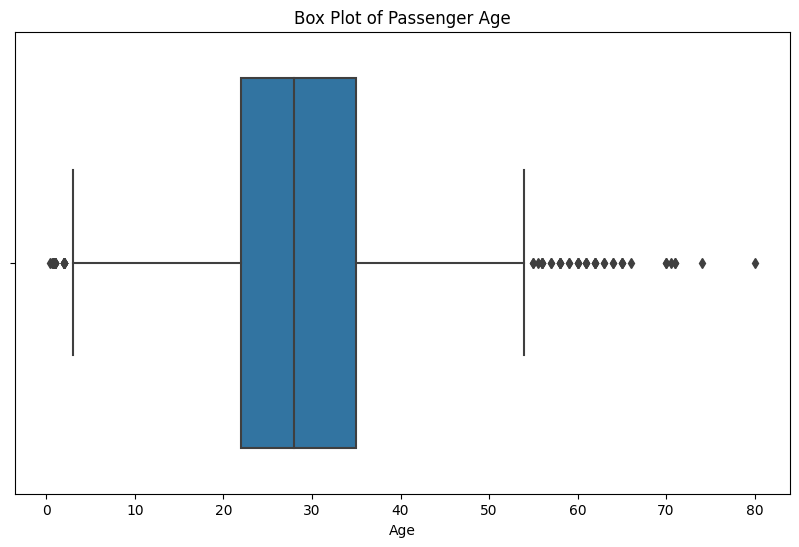

The age distribution of passengers shows a peak around 20-30 years old, with some outliers on both ends


In [25]:
# visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'].dropna())
plt.title('Box Plot of Passenger Age')
plt.xlabel('Age')
plt.show()

# Conclusion line
print("The age distribution of passengers shows a peak around 20-30 years old, with some outliers on both ends")


Model Training:

Select one machine learning model suitable for the given dataset and problem (e.g., Logistic Regression for classification).

Split the data into training and testing sets.
Train the model on the training set.


## Logistic Regression is a good starting point due to its simplicity and interpretability. It can provide baseline performance metrics and insights into feature importance.



### LOADING THE DATASET

In [26]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


### We will map the values of male as 1 and female as 0 respectively which is known as binary encoding. It helps in converting categorical columns into numerical format
### Machine learning algorithms require numerical inputs, so converting categorical variables like 'sex' into numerical values ensures compatibility with these algorithm

In [27]:
# Map 'male' to 1 and 'female' to 0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

print(df.head())


   survived  pclass  sex   age  sibsp  parch     fare embarked  class    who  \
0         0       3    1  22.0      1      0   7.2500        S  Third    man   
1         1       1    0  38.0      1      0  71.2833        C  First  woman   
2         1       3    0  26.0      0      0   7.9250        S  Third  woman   
3         1       1    0  35.0      1      0  53.1000        S  First  woman   
4         0       3    1  35.0      0      0   8.0500        S  Third    man   

   adult_male  embark_town alive  alone  
0        True  Southampton    no  False  
1       False    Cherbourg   yes  False  
2       False  Southampton   yes   True  
3       False  Southampton   yes  False  
4        True  Southampton    no   True  


In [70]:
print(df["sex"].unique()) #checking the mapped values

[1 0]


In [29]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


### The selected features are 'pclass', 'age', 'sibsp', 'parch', 'fare', and 'sex'. These columns are used to create the feature matrix x.

### survived column represents whether a passenger survived (1) or not (0) and is used to create the target vector y.

###  The feature matrix x and target vector y are prepared for use in machine learning models. x contains the independent variables that the model will use to make predictions, and y contains the dependent variable that the model will learn to predict.


In [30]:
# seperate dependent and independent variables

x = df[["pclass","age","sibsp","parch","fare","sex"]]
y = df["survived"]

In [31]:
x

,pclass,age,sibsp,parch,fare,sex
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1
887,1,19.0,0,0,30.0000,0
888,3,28.0,1,2,23.4500,0
889,1,26.0,0,0,30.0000,1


In [32]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

## Data Modelling Using Linear Regression

In [33]:
# build the model

In [34]:
# import train test split method

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# train test split

In [37]:
 x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

### Dataset splits into testing and training sets.  The train_test_split function from sklearn.model_selection is used to randomly divide the data into two parts: one for training the model (x_train and y_train) and one for evaluating the model (x_test and y_test).

### The test_size=0.33 parameter specifies that 33% of the data should be allocated to the test set, while the remaining 67% will be used for training

### The random_state=42 parameter sets a seed for the random number generator

In [38]:
# import logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
# fitting of the logistic regression

In [56]:
lr = LogisticRegression(max_iter = 200)

### lr is an instance of the logistic regression model configured to allow up to 200 iterations for convergence.

In [59]:

# Fit the model to the training data
lr.fit(x_train, y_train)



### This method fits the logistic regression model to the training data x_train and y_train. During this process, the model learns the relationships between the features (x_train) and the target variable (y_train) to make predictions.

In [60]:
y_pred = lr.predict(x_test)

In [43]:
# print confusion matrix

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
predict = lr.predict(x_test)

In [46]:
pd.DataFrame(confusion_matrix(y_test,predict),columns = ["pred NO","pred YES"], index = ["Actual NO","Actual YES"])

,pred NO,pred YES
Actual NO,156,19
Actual YES,34,86


###  This computes a confusion matrix based on the actual (y_test) and predicted (y_pred) target values.

In [47]:
# print classification report

In [48]:
from sklearn.metrics import  classification_report

print(classification_report(y_test,predict))


              precision    recall  f1-score   support

           0       0.82      0.89      0.85       175
           1       0.82      0.72      0.76       120

    accuracy                           0.82       295
   macro avg       0.82      0.80      0.81       295
weighted avg       0.82      0.82      0.82       295



### The classification_report function from sklearn.metrics provides a comprehensive report of key classification metrics for a given set of predicted and true labels.

### precision-It indicates the proportion of positive predictions that are actually correct.

### recall -  It indicates the model's ability to correctly identify positive instances.

### f1 score -  F1-score is useful when you need to seek a balance between precision and recall and there is an uneven class distribution (large number of Actual NO compared to Actual YES).

### support-Support is the number of actual occurrences of the class in the specified dataset.
### It is the number of samples of the true response that lie in that class.




In [49]:
# hyperparameter tuning

In [62]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1.0, 10.0]} #define the parameter grid
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)# initialize grid search cv object
grid_search.fit(x_train, y_train)#fit the grid search to training data
print("Best parameters found:", grid_search.best_params_) #print the best parameters


Best parameters found: {'C': 1.0}


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Parameter Grid: Defines the values of C to be tested.
### GridSearchCV: Searches for the best C value using cross-validation.
### Best Parameters: Prints the best parameter (C) found by the grid search, which optimizes the logistic regression model for your specific dataset and problem.

In [51]:
#The hyperparameter tuning using GridSearchCV identified the optimal value for the regularization strength C, enhancing the logistic regression model's performance.

In [52]:
# Export the optimized model in a deployable format 

In [63]:
import joblib
joblib_file = "optimized_logistic_regression_model.pkl"
joblib.dump(grid_search.best_estimator_, 'optimized_logistic_regression_model.joblib')

print(f"Model saved to {joblib_file}")


Model saved to optimized_logistic_regression_model.pkl


### Saving the Model: This code saves the best logistic regression model


In [ ]:
 #simple script that demonstrates loading the model and making predictions on new data.


In [69]:
import numpy as np
# Load the optimized model from the file
model_filename = "optimized_logistic_regression_model.pkl"
loaded_model = joblib.load(model_filename)
# we will take any new data for prediction
# [pclass, sex, age, sibsp, parch, fare]
new_data = np.array([[1, 0, 28.0, 0, 0, 100.0]])
prediction = loaded_model.predict(new_data)
if prediction[0] == 1:
    print("The passenger is predicted to survive")
else:
    print("The passenger is predicted not to survive",prediction)



The passenger is predicted not to survive [0]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Loading the Model: The code loads the pre-trained logistic regression model (optimized_logistic_regression_model.pkl) using joblib.
### Preparing New Data:  a numpy array representing new input features for prediction (e.g., [1, 0, 28.0, 0, 0, 100.0]).
### Making Predictions: Uses the loaded model (loaded_model.predict(new_data)) to predict whether a passenger according to the new data would survive or not.
### Output Prediction: Prints whether the passenger is predicted to survive based on the model's prediction (prediction). If models prediction is 0 print that the passenger is predicted not to survive or if the models prediction is 1 print that the passenger is predicted to survive